The goal is to find joint values of variables $X = (X_1, X_2, ..., X_p)$ that appear most frequenty in the dataset.

Read: https://www.kaggle.com/code/xvivancos/market-basket-analysis

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("../BreadBasket_DMS.csv")

data.head()

,Date,Time,Transaction,Item
0,10/30/2016,9:58:11,1,Bread
1,10/30/2016,10:05:34,2,Scandinavian
2,10/30/2016,10:05:34,2,Scandinavian
3,10/30/2016,10:07:57,3,Hot chocolate
4,10/30/2016,10:07:57,3,Jam


<Axes: xlabel='Item', ylabel='Absolute Frequency'>

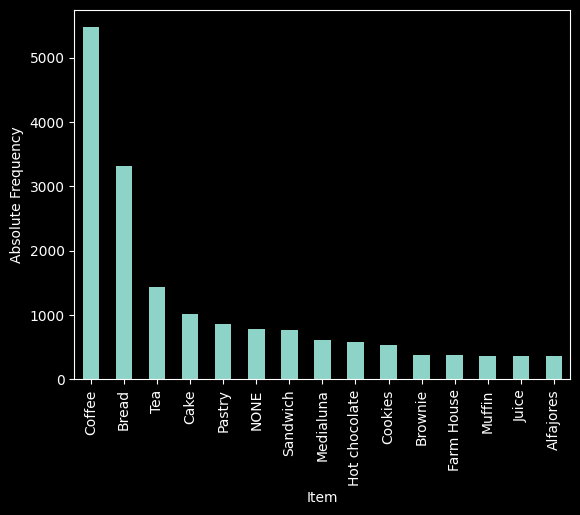

In [17]:
data["Item"].value_counts().head(15).plot(
    kind="bar", xlabel="Item", ylabel="Absolute Frequency"
)

## A Priori Algorithm

The first step in order to create a set of association rules is to determine the optimal thresholds for support and confidence. If we set these values too low, then the algorithm will take longer to execute and we will get a lot of rules (most of them will not be useful).

In [29]:
from efficient_apriori import apriori

transactions = (
    data.drop(["Date", "Time"], axis=1, inplace=False)
    .groupby("Transaction", as_index=True)["Item"]
    .agg(list)
)


itemsets, rules = apriori(transactions, min_support=0.01, min_confidence=0.5)

In [ ]:
for rule in rules:
    print(
        f"{rule.lhs[0]} => {rule.rhs[0]}\t{rule.confidence:0.3f}\t{rule.support: 0.3f}\t{rule.conviction: 0.3f}"
    )

Alfajores => Coffee	0.541	 0.020	 1.143
Cake => Coffee	0.527	 0.054	 1.110
Cookies => Coffee	0.518	 0.028	 1.090
Hot chocolate => Coffee	0.507	 0.029	 1.065
Juice => Coffee	0.534	 0.020	 1.127
Medialuna => Coffee	0.569	 0.035	 1.219
NONE => Coffee	0.533	 0.042	 1.123
Pastry => Coffee	0.552	 0.047	 1.172
Sandwich => Coffee	0.532	 0.038	 1.122
Scone => Coffee	0.523	 0.018	 1.100
Spanish Brunch => Coffee	0.599	 0.011	 1.308
Toast => Coffee	0.704	 0.024	 1.776
